<a href="https://colab.research.google.com/github/sthory2345/dsmp_tasks/blob/main/Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [ ]:
# Link - https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


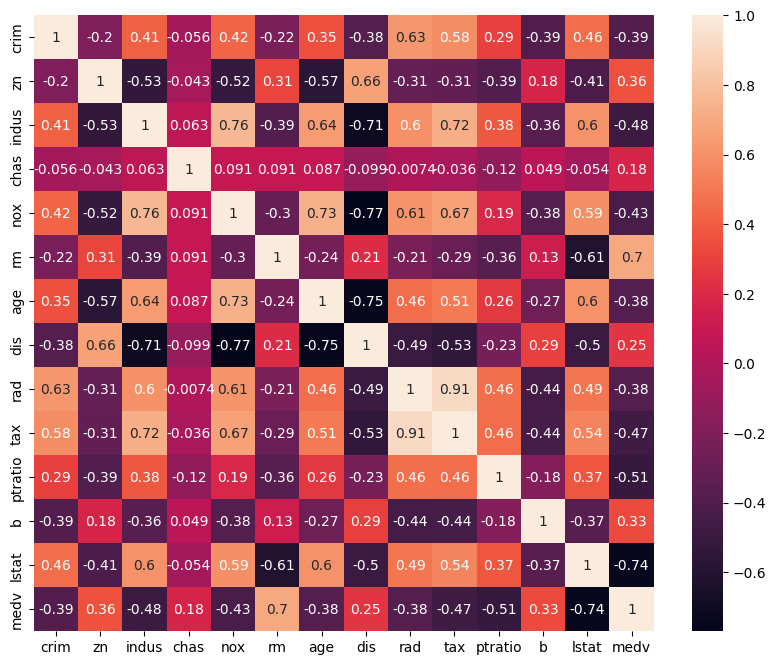

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [4]:
df.shape

(506, 14)

In [5]:
# removing the corelated features
target_col = 'medv'
corr_matrix = df.corr()
threshold = 0.8

features_to_remove = set()
# fetch column names excluding target column
feature_columns = [col for col in corr_matrix.columns if col != target_col]
# Iterate through all unique pairs of features
for i in range(len(feature_columns)):
    for j in range(i + 1, len(feature_columns)):
        col1 = feature_columns[i]
        col2 = feature_columns[j]

        if abs(corr_matrix.loc[col1, col2]) >= threshold:
            # Compare their absolute correlation with the target column
            if abs(corr_matrix.loc[col1, target_col]) < abs(corr_matrix.loc[col2, target_col]):
                features_to_remove.add(col1)
            else:
                features_to_remove.add(col2)

df_filtered = df.drop(columns=list(features_to_remove))

In [6]:
df_filtered.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


In [10]:
# VIF APPROACH

In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.loc[:, df.columns != 'medv']
y = df['medv']
vif = []
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X.values, i))

In [8]:
vif = pd.DataFrame(vif)
vif

,0
0,2.100373
1,2.844013
2,14.485758
3,1.152952
4,73.894947
5,77.948283
6,21.386850
7,14.699652
8,15.167725
9,61.227274


In [9]:
vif.shape

(13, 1)

In [13]:
# Set the threshold for VIF
vif_threshold = 5

# Identify the integer indices of features with high VIF values
high_vif_indices = vif[vif[0] > vif_threshold].index.values

# Map these integer indices to their corresponding feature names from X.columns
high_vif_features = X.columns[high_vif_indices]

# Remove these high VIF features from the original features DataFrame X
df_filtered_vif = X.drop(columns=high_vif_features)

df_filtered_vif

,crim,zn,chas
0,0.00632,18.0,0
1,0.02731,0.0,0
2,0.02729,0.0,0
3,0.03237,0.0,0
4,0.06905,0.0,0
...,...,...,...
501,0.06263,0.0,0
502,0.04527,0.0,0
503,0.06076,0.0,0
504,0.10959,0.0,0


In [ ]:
#CONDITION NO. APPROACH

In [14]:
X = df.drop('medv', axis=1)
y = df['medv']

In [15]:
condition_no = np.linalg.cond(X)
condition_no

np.float64(8497.936303845774)

In [16]:

# ols regression summary report

In [17]:
import statsmodels.api as sm
X = df.drop('medv', axis=1)
y = df['medv']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 18 Feb 2026   Prob (F-statistic):          6.72e-135
Time:                        05:28:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0